In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("Shape Trainingsdata: {}".format(train_images.shape))
print("Dimension Picture No. 5: {}".format(train_images[5].shape))
print("Label of Picture No. 5: {}".format(train_labels[5]))


Shape Trainingsdata: (60000, 28, 28)
Dimension Picture No. 5: (28, 28)
Label of Picture No. 5: 2


In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255


test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255



In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

NrTrainimages = train_images.shape[0]
NrTestimages = test_images.shape[0]

In [6]:
import matplotlib.pyplot as plt
import random
randindex = random.randint(0,60000)
plttitle = "Trainpicture Nr. {} \n Class: {}".format(randindex,train_labels[randindex])
plt.imshow(train_images[randindex].reshape(28,28),cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()
#train_images[randindex]

<Figure size 640x480 with 1 Axes>

### Weiter

In [7]:
import os
import numpy as np

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k

In [8]:
LOGDIR = "\log"
my_tensorboard = TensorBoard(log_dir = LOGDIR, 
                            histogram_freq=0, 
                            write_graph=True, 
                            write_images=True)






In [10]:
mnist_inputshape = train_images[0].shape

model = Sequential()

model.add(Conv2D(32, kernel_size=(5,5), 
                 activation = 'relu', 
                 input_shape=mnist_inputshape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu', name='features'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
features (Dense)             (None, 128)              

In [11]:
my_batch_size = 128
my_num_class = 10
my_epochs = 6
model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
        batch_size=my_batch_size, 
        callbacks=[my_tensorboard], 
        epochs=my_epochs, 
        verbose=1, 
        validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 46s 762us/sample - loss: 0.3970 - acc: 0.8724 - val_loss: 0.0613 - val_acc: 0.9800
Epoch 2/6
60000/60000 [==============================] - 44s 731us/sample - loss: 0.1170 - acc: 0.9660 - val_loss: 0.0431 - val_acc: 0.9855
Epoch 3/6
60000/60000 [==============================] - 43s 722us/sample - loss: 0.0861 - acc: 0.9747 - val_loss: 0.0310 - val_acc: 0.9897
Epoch 4/6
60000/60000 [==============================] - 45s 758us/sample - loss: 0.0735 - acc: 0.9783 - val_loss: 0.0292 - val_acc: 0.9901
Epoch 5/6
60000/60000 [==============================] - 49s 817us/sample - loss: 0.0642 - acc: 0.9808 - val_loss: 0.0246 - val_acc: 0.9920
Epoch 6/6
60000/60000 [==============================] - 49s 822us/sample - loss: 0.0578 - acc: 0.9829 - val_loss: 0.0249 - val_acc: 0.9913


In [12]:
score = model.evaluate(test_images, test_labels)
print('Test Verlust:', score[0])
print('Test Genauigkeit:', score[1])


10000/10000 [==============================] - 3s 294us/sample - loss: 0.0249 - acc: 0.9913
Test Verlust: 0.024882994672410133
Test Genauigkeit: 0.9913


In [13]:
model.save('cnn.h5')
model.save_weights("cnn_weights.h5")

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [14]:
import tensorflow as tf

8


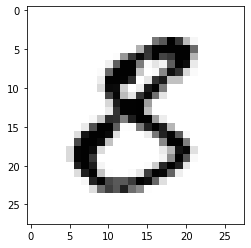

In [15]:
image_index = 1234
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())                     

In [38]:
converter = tf.lite.TFLiteConverter.from_saved_model(cnn.h5)
tflite_model = converter.convert()

open("mnist_model.tflite", "wb").write(tflite_model)

#model.save('CNN.h5')

NameError: name 'cnn' is not defined